In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spotifydataset.csv')

In [3]:
df.shape

(1000, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   artist_name        1000 non-null   object 
 2   genres             837 non-null    object 
 3   followers          1000 non-null   int64  
 4   artist_popularity  1000 non-null   int64  
 5   artist_url         1000 non-null   object 
 6   track_name         1000 non-null   object 
 7   album_name         1000 non-null   object 
 8   release_date       1000 non-null   object 
 9   duration_ms        1000 non-null   int64  
 10  explicit           1000 non-null   bool   
 11  track_popularity   1000 non-null   int64  
 12  danceability       1000 non-null   float64
 13  energy             1000 non-null   float64
 14  key                1000 non-null   int64  
 15  loudness           1000 non-null   float64
 16  mode               1000 n

## Data Preprocessing

In [5]:
## Fill the missing value
values = {'genres': 'Unknown'}
df.fillna(value=values, inplace = True)

In [6]:
## Create a New Column 'Tempo Range'
#condition = [(df['tempo'] < 90), (df['tempo'] >= 90) & (df['tempo'] <= 120), (df['tempo'] > 120)]
condition = [(df['tempo'] < 90), (df['tempo'] < 121), (df['tempo'] < 205)]
choice = ['Slow', 'Medium', 'Fast']
df['Tempo_Range'] = np.select(condition, choice, default = 'Unknown')

In [7]:
## Create a New Column 'Track Popularity Range'
condition = [(df['track_popularity'] < 26), (df['track_popularity'] >= 26) & (df['track_popularity'] <= 50), (df['track_popularity'] >= 51) & (df['track_popularity'] <= 75), (df['track_popularity'] > 75)]
choice = ['0 - 25', '26 - 50', '51 - 75', '76 - 100']
df['Track_Popularity_Range'] = np.select(condition, choice, default = 'Unknown')

In [8]:
## Drop Unnamed Column
df = df.drop(columns = ['Unnamed: 0', 'release_date'])

In [9]:
df.shape

(1000, 23)

In [10]:
df.columns

Index(['artist_name', 'genres', 'followers', 'artist_popularity', 'artist_url',
       'track_name', 'album_name', 'duration_ms', 'explicit',
       'track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'Tempo_Range', 'Track_Popularity_Range'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   artist_name             1000 non-null   object 
 1   genres                  1000 non-null   object 
 2   followers               1000 non-null   int64  
 3   artist_popularity       1000 non-null   int64  
 4   artist_url              1000 non-null   object 
 5   track_name              1000 non-null   object 
 6   album_name              1000 non-null   object 
 7   duration_ms             1000 non-null   int64  
 8   explicit                1000 non-null   bool   
 9   track_popularity        1000 non-null   int64  
 10  danceability            1000 non-null   float64
 11  energy                  1000 non-null   float64
 12  key                     1000 non-null   int64  
 13  loudness                1000 non-null   float64
 14  mode                    1000 non-null   i

In [12]:
df.describe()

,followers,artist_popularity,duration_ms,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.150655e+07,59.429000,212368.619000,59.429000,0.611430,0.660562,5.243000,-7.160373,0.613000,0.091402,0.265840,0.074700,0.188810,0.516641,122.143448
std,2.293890e+07,23.884963,65706.472572,23.884963,0.167246,0.207568,3.613725,4.479642,0.487307,0.090441,0.288895,0.225472,0.145454,0.232896,28.053658
min,2.000000e+00,0.000000,51680.000000,0.000000,0.069000,0.003540,0.000000,-39.482000,0.000000,0.023200,0.000005,0.000000,0.026000,0.032600,49.305000
25%,1.038784e+06,57.000000,173083.000000,57.000000,0.505500,0.539500,2.000000,-8.334250,0.000000,0.037975,0.028325,0.000000,0.095700,0.343500,99.983500
50%,3.923159e+06,67.000000,204382.500000,67.000000,0.634000,0.680500,5.000000,-5.943500,1.000000,0.054800,0.152500,0.000004,0.129000,0.522000,122.073500
75%,1.142132e+07,74.000000,244192.750000,74.000000,0.728250,0.820000,9.000000,-4.582500,1.000000,0.106000,0.416250,0.000586,0.246500,0.686250,138.667250
max,1.194287e+08,92.000000,707160.000000,92.000000,0.964000,0.998000,11.000000,0.273000,1.000000,0.874000,0.996000,0.972000,0.984000,0.973000,201.776000


In [13]:
df.head(20)

,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,duration_ms,explicit,track_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Tempo_Range,Track_Popularity_Range
0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,228639,False,89,...,-8.334,1,0.0427,0.06150,0.000030,0.0740,0.2950,115.842,Medium,76 - 100
1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,173639,True,85,...,-5.854,0,0.0434,0.15700,0.000000,0.0732,0.4470,97.998,Medium,76 - 100
2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,92400,True,83,...,-9.480,1,0.0416,0.67000,0.000000,0.1760,0.3850,84.726,Slow,76 - 100
3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),191013,False,80,...,-4.645,1,0.0325,0.02150,0.000024,0.0936,0.5930,118.091,Medium,76 - 100
4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,214994,True,79,...,-6.614,1,0.0548,0.19000,0.000065,0.1130,0.7870,118.998,Medium,76 - 100
5,Ariana Grande,pop,98934105,82,https://open.spotify.com/artist/66CXWjxzNUsdJx...,One Last Time,My Everything - Deluxe,197266,False,82,...,-5.036,1,0.0323,0.09300,0.000002,0.0960,0.1040,125.025,Fast,76 - 100
6,Ariana Grande,pop,98934105,78,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Die For You (with Ariana Grande) - Remix,Starboy (Deluxe),232857,False,78,...,-7.635,0,0.0582,0.27600,0.000000,0.3230,0.5170,66.961,Slow,76 - 100
7,Ariana Grande,pop,98934105,82,https://open.spotify.com/artist/66CXWjxzNUsdJx...,7 rings,"thank u, next",178626,True,82,...,-10.732,0,0.3080,0.59100,0.000000,0.0881,0.3300,139.848,Fast,76 - 100
8,Ariana Grande,pop,98934105,70,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Dangerous Woman,Dangerous Woman,235946,False,70,...,-5.369,0,0.0412,0.05290,0.000000,0.3560,0.2890,134.049,Fast,51 - 75
9,Ariana Grande,pop,98934105,70,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Into You,Dangerous Woman,244453,False,70,...,-5.948,1,0.1070,0.01620,0.000002,0.1450,0.3700,107.853,Medium,51 - 75


## Data Visualization

In [14]:
# Combined Summary of Artist
summary = df.groupby('artist_name').agg({'track_name': 'count', 
                                         'track_popularity': 'mean',
                                         'genres': 'unique', 
                                         'followers': 'max',
                                         'artist_popularity': 'max'}).reset_index().rename(columns = {'track_name': 'No. of Tracks',
                                                                                                      'track_popularity': 'Avg Track Popularity',
                                                                                                     'genres': 'Genres',
                                                                                                           'followers': 'Followers',
                                                                                                           'artist_popularity': 'Artist Popularity'})
summary.sort_values(by = 'Artist Popularity', ascending = False).head(5)

,artist_name,No. of Tracks,Avg Track Popularity,Genres,Followers,Artist Popularity
80,Taylor Swift,10,85.7,[pop],119286617,92
49,Arctic Monkeys,10,78.7,"[garage rock, modern rock, permanent wave, roc...",26055385,91
51,Ariana Grande,10,79.8,[pop],98934105,89
68,Gracie Abrams,10,78.7,[alt z],2232980,87
61,Avicii,10,76.0,"[dance pop, edm, pop, pop dance]",22976158,86


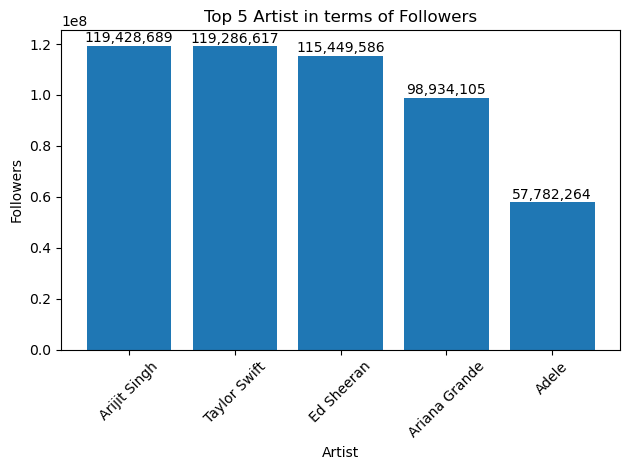

In [15]:
# Top 5 Artist based on follower
artist_follower = df.groupby('artist_name')['followers'].max().reset_index()
top_5_artist = artist_follower.sort_values(by = 'followers', ascending = False).head(5)
top_5_artist
for i in range(len(top_5_artist)):
    plt.text(i, top_5_artist['followers'].iloc[i] + 0.001 * top_5_artist['followers'].max(),  # Slightly above the bar
             f"{top_5_artist['followers'].iloc[i]:,}",  # Comma separator
             ha='center', va='bottom', fontsize=10)
plt.xlabel('Artist')
plt.ylabel('Followers')
plt.title('Top 5 Artist in terms of Followers')
plt.xticks(rotation = 45)
plt.bar(top_5_artist['artist_name'], top_5_artist['followers'])
plt.tight_layout()
plt.show()

### Arijit Singh has the highest number of followers with 119.4 million, followed closely by Taylor Swift with 119.2 million.

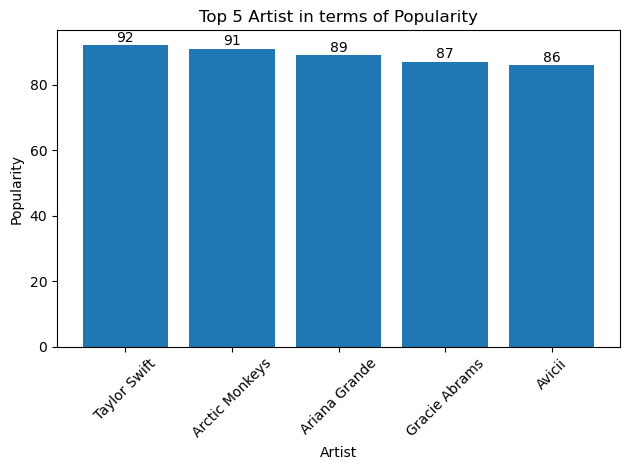

In [16]:
# Top 5 Artist based on popularity
artist_popular = df.groupby('artist_name')['artist_popularity'].max().reset_index()
top_5_artist = artist_popular.sort_values(by = 'artist_popularity', ascending = False).head(5)
top_5_artist 
for i in range(len(top_5_artist)):
    plt.text(i, top_5_artist['artist_popularity'].iloc[i] + 0.001 * top_5_artist['artist_popularity'].max(),  # Slightly above the bar
             f"{top_5_artist['artist_popularity'].iloc[i]:,}",  # Comma separator
             ha='center', va='bottom', fontsize=10)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Top 5 Artist in terms of Popularity')
plt.xticks(rotation = 45)
plt.bar(top_5_artist['artist_name'], top_5_artist['artist_popularity'])
plt.tight_layout()
plt.show()

### Taylor Swift and Arctic Monkeys have almost the same popularity, with scores of 92 and 91 respectively. Notably, Taylor Swift leads in both followers and popularity, with 119.2 million followers and a popularity score of 92.

In [17]:
# Artist per no. of tracks
Artist_tracks = df.groupby('artist_name')['track_name'].count().reset_index(name = 'No_of_Tracks').sort_values(by = 'No_of_Tracks', ascending = False)
Top_5 = Artist_tracks.head(5).style.hide(axis = 'index')
Top_5

artist_name,No_of_Tracks
A,106
a,12
Ashanti,10
Christina Aguilera,10
Ayra Starr,10


### The artist named 'A' has the highest number of tracks, with a total of 106. Another artist, 'a', has 12 tracks. While the names are visually similar, they may represent different artists, as identical or stylized names are common in the music industry.

<function matplotlib.pyplot.show(close=None, block=None)>

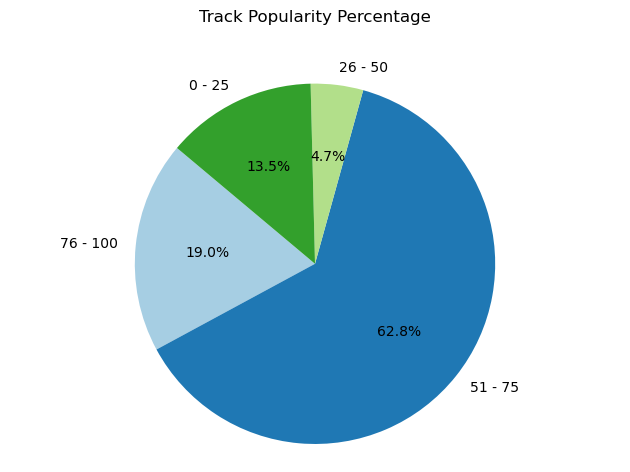

In [18]:
# No. of Tracks based on their popularity
tracks_popularity = df.groupby('Track_Popularity_Range')['track_name'].count().reset_index(name = 'No. of Tracks').sort_values(by = 'Track_Popularity_Range', ascending = False)
total_tracks = tracks_popularity['No. of Tracks'].sum()
tracks_popularity['Percentage'] = (tracks_popularity['No. of Tracks']/total_tracks * 100).round(2)

plt.pie(tracks_popularity['Percentage'], labels = tracks_popularity['Track_Popularity_Range'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Track Popularity Percentage', y = 1.09)
plt.axis('equal')
plt.tight_layout()
plt.show

### The majority of tracks fall within the popularity range of 51–75, contributing the highest share at 62.8%.

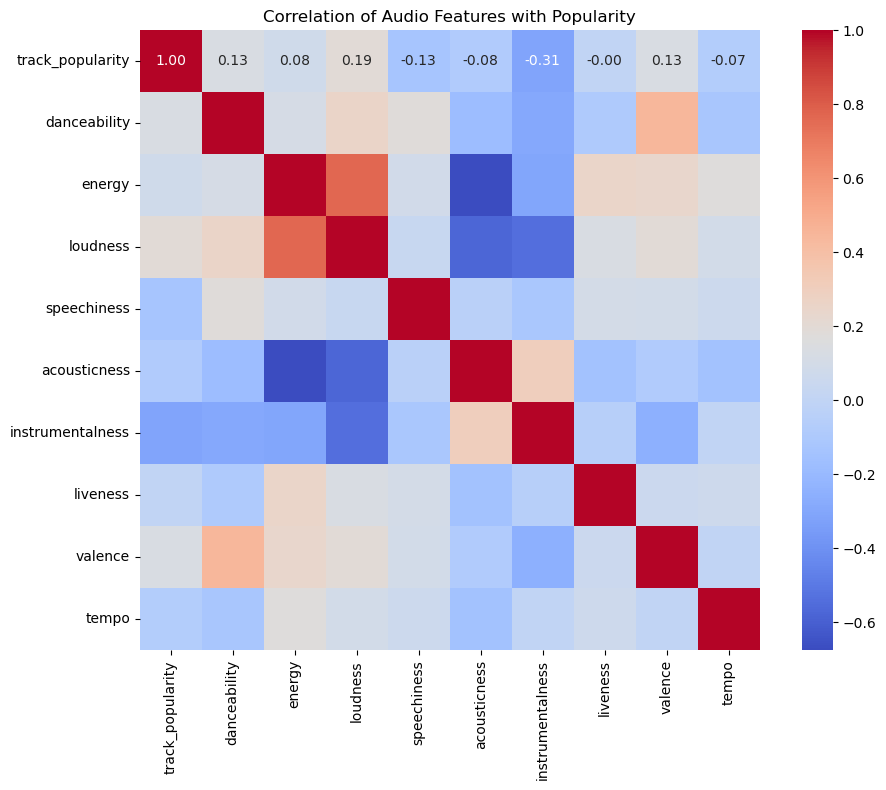

In [19]:
numeric_cols = [
    'track_popularity', 'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Drop rows with missing values in those columns
df_clean = df[numeric_cols].dropna()

# Correlation matrix
corr = df_clean.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation of Audio Features with Popularity")
plt.tight_layout()
plt.show()


### Tracks with higher popularity tend to have slightly higher danceability, energy, and loudness — features that align with what we typically enjoy in mainstream music. On the other hand, features like instrumentalness, liveness, and tempo show weak or even negative correlations with popularity. While the relationships are not strong, they do reflect real-life patterns where energetic and engaging tracks are generally more popular.

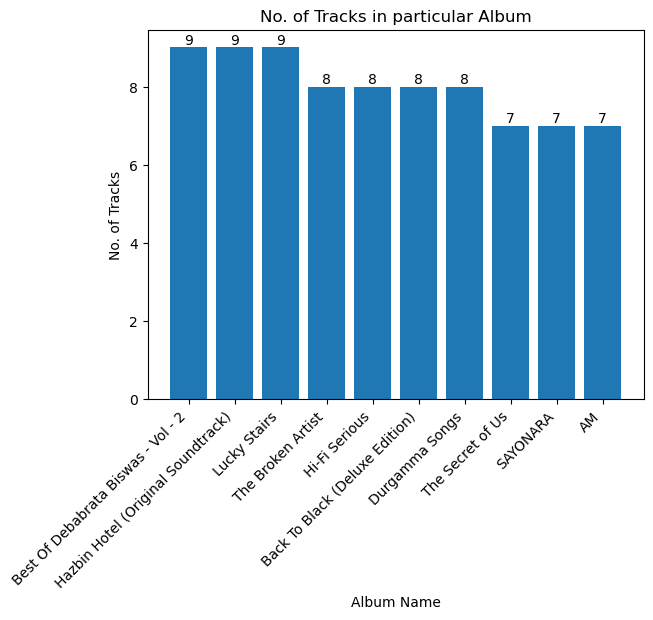

In [20]:
# Number of Albums
No_of_Albums = df.groupby('album_name')['track_name'].count().reset_index(name = 'No. of Tracks').sort_values(by = 'No. of Tracks', ascending = False)
Top_10_Albums= No_of_Albums.head(10)
for i in range(len(Top_10_Albums)):
    plt.text(i, Top_10_Albums['No. of Tracks'].iloc[i] + 0.0001 * Top_10_Albums['No. of Tracks'].max(),  # Slightly above the bar
             f"{Top_10_Albums['No. of Tracks'].iloc[i]:,}",  # Comma separator
             ha='center', va='bottom', fontsize=10)
plt.xlabel('Album Name')
plt.ylabel('No. of Tracks')
plt.title('No. of Tracks in particular Album')
plt.xticks(rotation = 45, ha = 'right')
plt.bar(Top_10_Albums['album_name'], Top_10_Albums['No. of Tracks'])
#plt.tight_layout()
plt.show()

### Out of 606 albums in the dataset, only three albums have the highest number of tracks — 9 each. These are: 'Best Of Debabrata Biswas - Vol. 2', 'Lucky Stairs', and 'Hazbin Hotel (Original Soundtrack)'.

<function matplotlib.pyplot.show(close=None, block=None)>

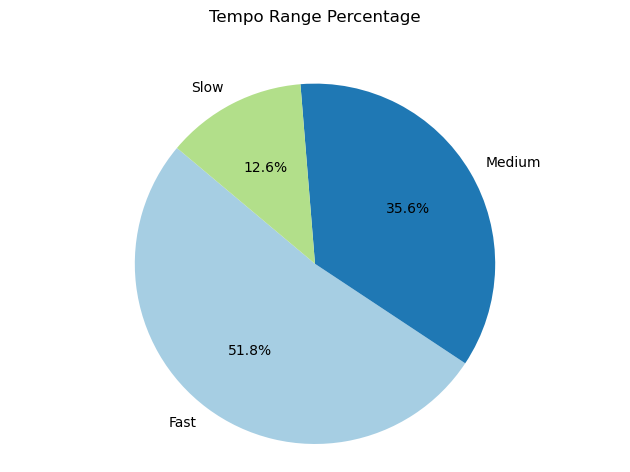

In [21]:
# tempo range
tempo_range = df.groupby('Tempo_Range')['tempo'].count().reset_index(name = 'No_of_Tracks')
total_tracks = tempo_range['No_of_Tracks'].sum()
tempo_range['%'] = (tempo_range['No_of_Tracks']/total_tracks * 100).round(2)
tempo_range
plt.pie(tempo_range['%'], labels = tempo_range['Tempo_Range'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Tempo Range Percentage', y = 1.09)
plt.axis('equal')
plt.tight_layout()
plt.show

### Fast tempo tracks have the highest contribution, accounting for 51.8% of the total. This indicates that a majority of tracks are composed at a higher speed compared to medium (35.6%) and slow tempo (12.6%) tracks.

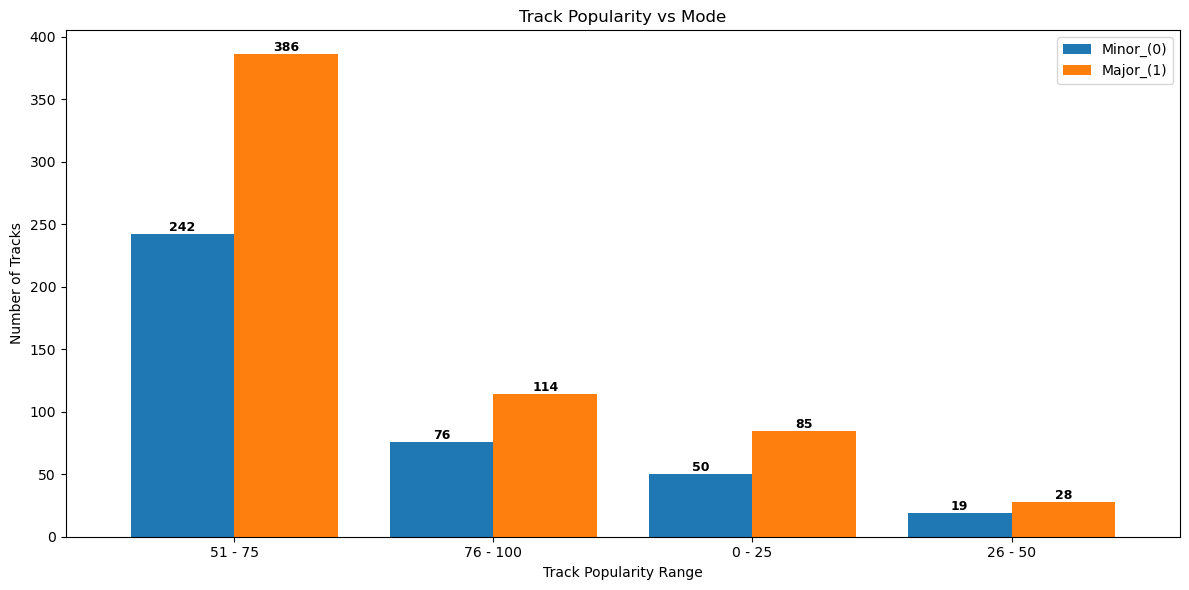

In [22]:
# Tracks Popularity across Mode

tracks_popularity_per_year_mode = df.groupby(['Track_Popularity_Range', 'mode']).size().unstack(fill_value=0).sort_values(by = 'Track_Popularity_Range', ascending = False)
tracks_popularity_per_year_mode.columns = ['Minor_(0)', 'Major_(1)']
tracks_popularity_per_year_mode['Total_no_of_tracks'] = tracks_popularity_per_year_mode['Minor_(0)'] + tracks_popularity_per_year_mode['Major_(1)']
sorted = tracks_popularity_per_year_mode.sort_values(by = 'Total_no_of_tracks', ascending = False)

# Plot grouped bar chart
ax = sorted[['Minor_(0)', 'Major_(1)']].plot(
    kind='bar',
    figsize=(12, 6),
    width=0.8)

# Set labels and title
plt.xlabel('Track Popularity Range')
plt.ylabel('Number of Tracks')
plt.title('Track Popularity vs Mode')
plt.xticks(rotation=0)

# Add data labels on each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',  # value as label
                    (p.get_x() + p.get_width() / 2, height),  # position on bar
                    ha='center', va='bottom', fontsize=9, color='black', fontweight = 'bold')

plt.tight_layout()
plt.show()

### The popularity range of 51–75 contains the highest number of tracks for both Major and Minor modes, with Major tracks (384) significantly outnumbering Minor tracks (242). Across all popularity ranges, Major key tracks consistently exceed Minor key tracks, suggesting that songs in major keys may be more broadly popular overall.

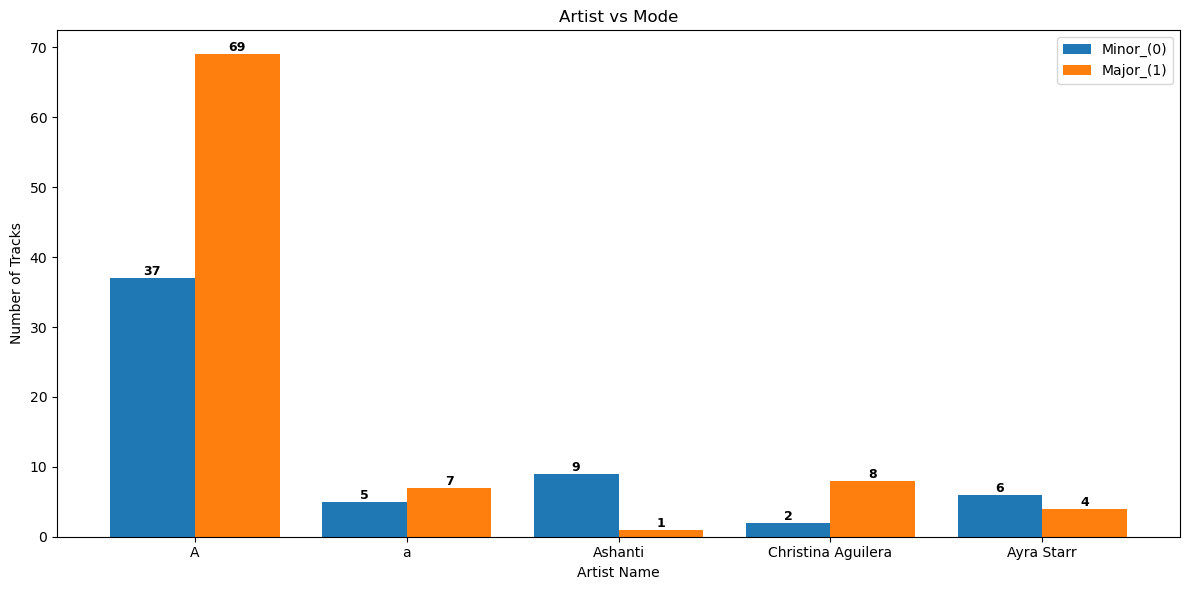

In [23]:
# Minor & Major across Artist
artist_per_mode = df.groupby(['artist_name','mode']).size().unstack(fill_value=0)
artist_per_mode.columns = ['Minor_(0)', 'Major_(1)']
artist_per_mode['Total_no_of_tracks'] = artist_per_mode['Minor_(0)'] + artist_per_mode['Major_(1)']
top_5 = artist_per_mode.sort_values(by = 'Total_no_of_tracks', ascending = False).head(5)
top_5

# Plot grouped bar chart
ax = top_5[['Minor_(0)', 'Major_(1)']].plot(
    kind='bar',
    figsize=(12, 6),
    width=0.8)

# Set labels and title
plt.xlabel('Artist Name')
plt.ylabel('Number of Tracks')
plt.title('Artist vs Mode')
plt.xticks(rotation=0)

# Add data labels on each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',  # value as label
                    (p.get_x() + p.get_width() / 2, height),  # position on bar
                    ha='center', va='bottom', fontsize=9, color='black', fontweight = 'bold')

plt.tight_layout()
plt.show()

### Most artists in the chart favor major keys, with Artist “A” standing out for both the highest track count and a strong major preference.
### Ashanti and Ayra Starr lean more towards minor keys, giving their music a darker, more emotional tone.


In [24]:
# Percentage acroos Mode

mode_count = df['mode'].value_counts()
minor_count = mode_count.get(0, 0)
major_count = mode_count.get(1, 0)

percentage_minor = minor_count / (minor_count + major_count) * 100
print('minor %:', percentage_minor)
percentage_major = major_count / (minor_count + major_count) * 100
print('major %:', percentage_major)

minor %: 38.7
major %: 61.3


### The dataset leans toward major key compositions, which are generally associated with brighter, happier, or more uplifting tones, while a significant minority (~39%) are in minor keys, adding emotional depth or darker moods.

# Dataset Summary: Key Insights

## This dataset reveals a rich overview of artist metrics, track features, popularity trends, and musical preferences. Below is a summary of the key findings:

### Top Artists in Popularity and Followers

#### -> Arijit Singh leads in followers with 119.4 million, closely followed by Taylor Swift at 119.2 million.

#### -> Taylor Swift also tops in popularity with a score of 92, just above Arctic Monkeys (91), making her dominant in both reach and recognition.


### Artist Activity and Name Ambiguity

#### -> The artist listed as 'A' has the most tracks (106), followed by another similarly named artist 'a' with 12 tracks. These may represent different entities, highlighting the challenge of name duplication or stylization in music metadata.

### Track Popularity Distribution

#### -> The 51–75 popularity range holds the largest share of tracks (62.8%), indicating that most tracks are moderately popular.

#### -> Within all popularity ranges, Major key tracks consistently outnumber Minor key tracks, especially in the 51–75 range, where Major tracks total 384 vs. 242 Minor.

### Musical Features and Popularity Correlation

#### -> Tracks with higher popularity tend to exhibit greater danceability, energy, and loudness—characteristics aligned with mainstream appeal.

#### -> Conversely, features such as instrumentalness, liveness, and tempo show weaker or even negative correlations with popularity.

### Most Popular Songs

#### -> Songs like "we can't be friends (wait for your love)", "Fortnight (feat. Post Malone)", and "I Can Do It With a Broken Heart" appear among the top tracks, indicating their recent release and massive popularity.

### Album Track Count

#### -> Out of 606 albums, only three have the maximum of 9 tracks:

####   - Best Of Debabrata Biswas - Vol. 2

####   - Lucky Stairs

####   - Hazbin Hotel (Original Soundtrack)

### Tempo Preferences

#### -> Fast-tempo tracks dominate the dataset, accounting for 51.8%, followed by medium (35.6%) and slow (12.6%) tempo tracks, reflecting a general preference for upbeat music.

### Mode

#### -> Major keys dominate overall (61.3%), aligning with their association to brighter, more uplifting tones, while minor keys (38.7%) add emotional and moody diversity.

#### -> Artist “A” leads in both total tracks and major mode usage, whereas Ashanti and Ayra Starr lean towards minor keys.

#### -> Track popularity trends show major mode leading across all popularity ranges, especially in the 51–75 range (384 major vs 242 minor) and 76–100 range (113 major vs 76 minor), indicating that major-key songs tend to achieve higher popularity more consistently.

# Overall Conclusion

### This Spotify dataset provides a comprehensive lens into contemporary music trends, artist influence, and listener preferences. The dominance of global artists like Arijit Singh and Taylor Swift in both followers and popularity highlights their widespread appeal. A notable skew toward moderately popular tracks (51–75 range), particularly in major keys (61.3%), suggests a trend toward easily digestible, mainstream-friendly music. Major keys prevail across all popularity levels, while minor keys (38.7%) contribute emotional depth but tend to be less commercially dominant. Popular tracks share common traits like high danceability, energy, and loudness, reinforcing the link between audio features and commercial success. Artist “A” mirrors the major-key dominance with a large discography, whereas Ashanti and Ayra Starr lean toward minor modes, offering stylistic contrast. Despite anomalies like artist name duplication, the dataset offers strong signals: audiences favor fast-tempo, energetic music, and recent hits continue to shape listening behavior. Overall, the data underscores how musical features, artist branding, and release timing collectively influence track success in the streaming era.

## Note

### The release_date column was dropped due to over 50% invalid entries, and because accurate replacement was not possible without introducing bias or assumptions.